## The objective of this study is to analyze the impact of CO2 emissions on climate change across different regions, examining if higher emissions are correlated with poorer environmental quality and climate-related incidents 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\NIHAL PANDEY 31\Downloads\Carbon_(CO2)_Emissions_by_Country.csv")
df.head()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,01-01-2011,8930.0,0.31
1,Afghanistan,Asia,01-01-2012,8080.0,0.27
2,Afghanistan,Asia,01-01-2010,7110.0,0.25
3,Afghanistan,Asia,01-01-2019,6080.0,0.16
4,Afghanistan,Asia,01-01-2018,6070.0,0.17


In [3]:
df.shape

(5677, 5)

In [4]:
df.tail()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
5672,Zimbabwe,Africa,01-01-2004,9770.0,0.80
5673,Zimbabwe,Africa,01-01-2007,9760.0,0.78
5674,Zimbabwe,Africa,01-01-2010,9600.0,0.75
5675,Zimbabwe,Africa,01-01-2009,7750.0,0.61
5676,Zimbabwe,Africa,01-01-2008,7600.0,0.61


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5677 entries, 0 to 5676
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 5677 non-null   object 
 1   Region                  5677 non-null   object 
 2   Date                    5677 non-null   object 
 3   Kilotons of Co2         5677 non-null   float64
 4   Metric Tons Per Capita  5677 non-null   float64
dtypes: float64(2), object(3)
memory usage: 221.9+ KB


In [30]:
skewness = df['Kilotons of Co2'].skew()
print( skewness)


-0.05134249165213394


the data skewness was 10, which was then transformed and then made -0.0513

In [ ]:
from scipy import stats
df['Kilotons of Co2'], _ = stats.boxcox(df['Kilotons of Co2'] + 1)  # Add 1 to avoid issues with zero values

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['Kilotons of Co2'] = scaler.fit_transform(df[['Kilotons of Co2']])

In [32]:
df.sample()

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
4331,Senegal,Africa,1997-01-01,-0.398707,0.35


In [33]:
# df.describe().T.plot(kind='bar')
df.describe()

,Date,Kilotons of Co2,Metric Tons Per Capita
count,5677,5.677000e+03,5677.000000
mean,2004-07-17 20:37:34.993834880,2.778589e-16,4.325505
min,1990-01-01 00:00:00,-3.522212e+00,0.000000
25%,1997-01-01 00:00:00,-7.257022e-01,0.570000
50%,2005-01-01 00:00:00,8.111878e-03,2.360000
75%,2012-01-01 00:00:00,7.265502e-01,6.340000
max,2019-01-01 00:00:00,2.748377e+00,47.650000
std,NaN,1.000088e+00,5.503834


## Kilotons of CO2 Emissions by Country varries a lot as we can see from the above table 
### this shows that there is disproportionate distribution of CO2 emissions across the globe and some countries are emitting more CO2 than others.

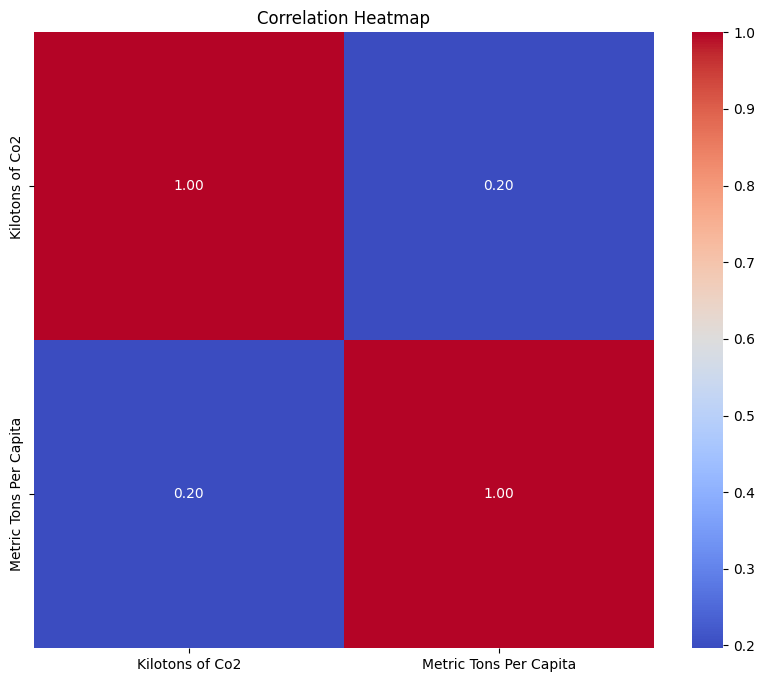

In [8]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Axes: >

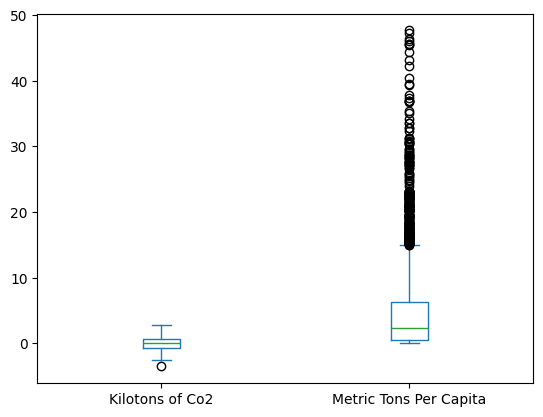

In [56]:
import missingno as msno
df.plot(kind= "box")  

In [55]:
# Calculate the IQR for 'Metric Tons Per Capita'
Q1 = df['Metric Tons Per Capita'].quantile(0.25)
Q3 = df['Metric Tons Per Capita'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers
df_no_outliers = df[(df['Metric Tons Per Capita'] >= lower_bound) & (df['Metric Tons Per Capita'] <= upper_bound)]


In [10]:
df.columns.to_list()

['Country', 'Region', 'Date', 'Kilotons of Co2', 'Metric Tons Per Capita']

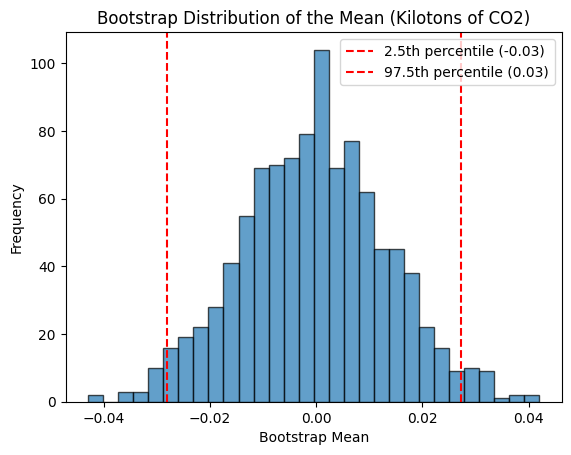

95% Confidence Interval for the Mean of Kilotons of CO2: (-0.03, 0.03)


In [53]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define the statistic (mean of 'Kilotons of Co2')
data = df['Kilotons of Co2'].dropna()  # Drop NaN values

# Step 2: Set the number of bootstrap iterations (e.g., 1000)
n_iterations = 1000
bootstrap_means = []

# Step 3: Resampling and calculating the statistic
for i in range(n_iterations):
    sample = np.random.choice(data, size=len(data), replace=True)  # Resampling with replacement
    sample_mean = np.mean(sample)
    bootstrap_means.append(sample_mean)

# Step 4: Calculate the 95% confidence interval (percentile method)
lower_bound = np.percentile(bootstrap_means, 2.5)  # 2.5th percentile
upper_bound = np.percentile(bootstrap_means, 97.5)  # 97.5th percentile

# Step 5: Visualize the bootstrap distribution
plt.hist(bootstrap_means, bins=30, edgecolor='k', alpha=0.7)
plt.axvline(x=lower_bound, color='r', linestyle='--', label=f'2.5th percentile ({lower_bound:.2f})')
plt.axvline(x=upper_bound, color='r', linestyle='--', label=f'97.5th percentile ({upper_bound:.2f})')
plt.title('Bootstrap Distribution of the Mean (Kilotons of CO2)')
plt.xlabel('Bootstrap Mean')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Step 6: Output the confidence interval
print(f"95% Confidence Interval for the Mean of Kilotons of CO2: ({lower_bound:.2f}, {upper_bound:.2f})")


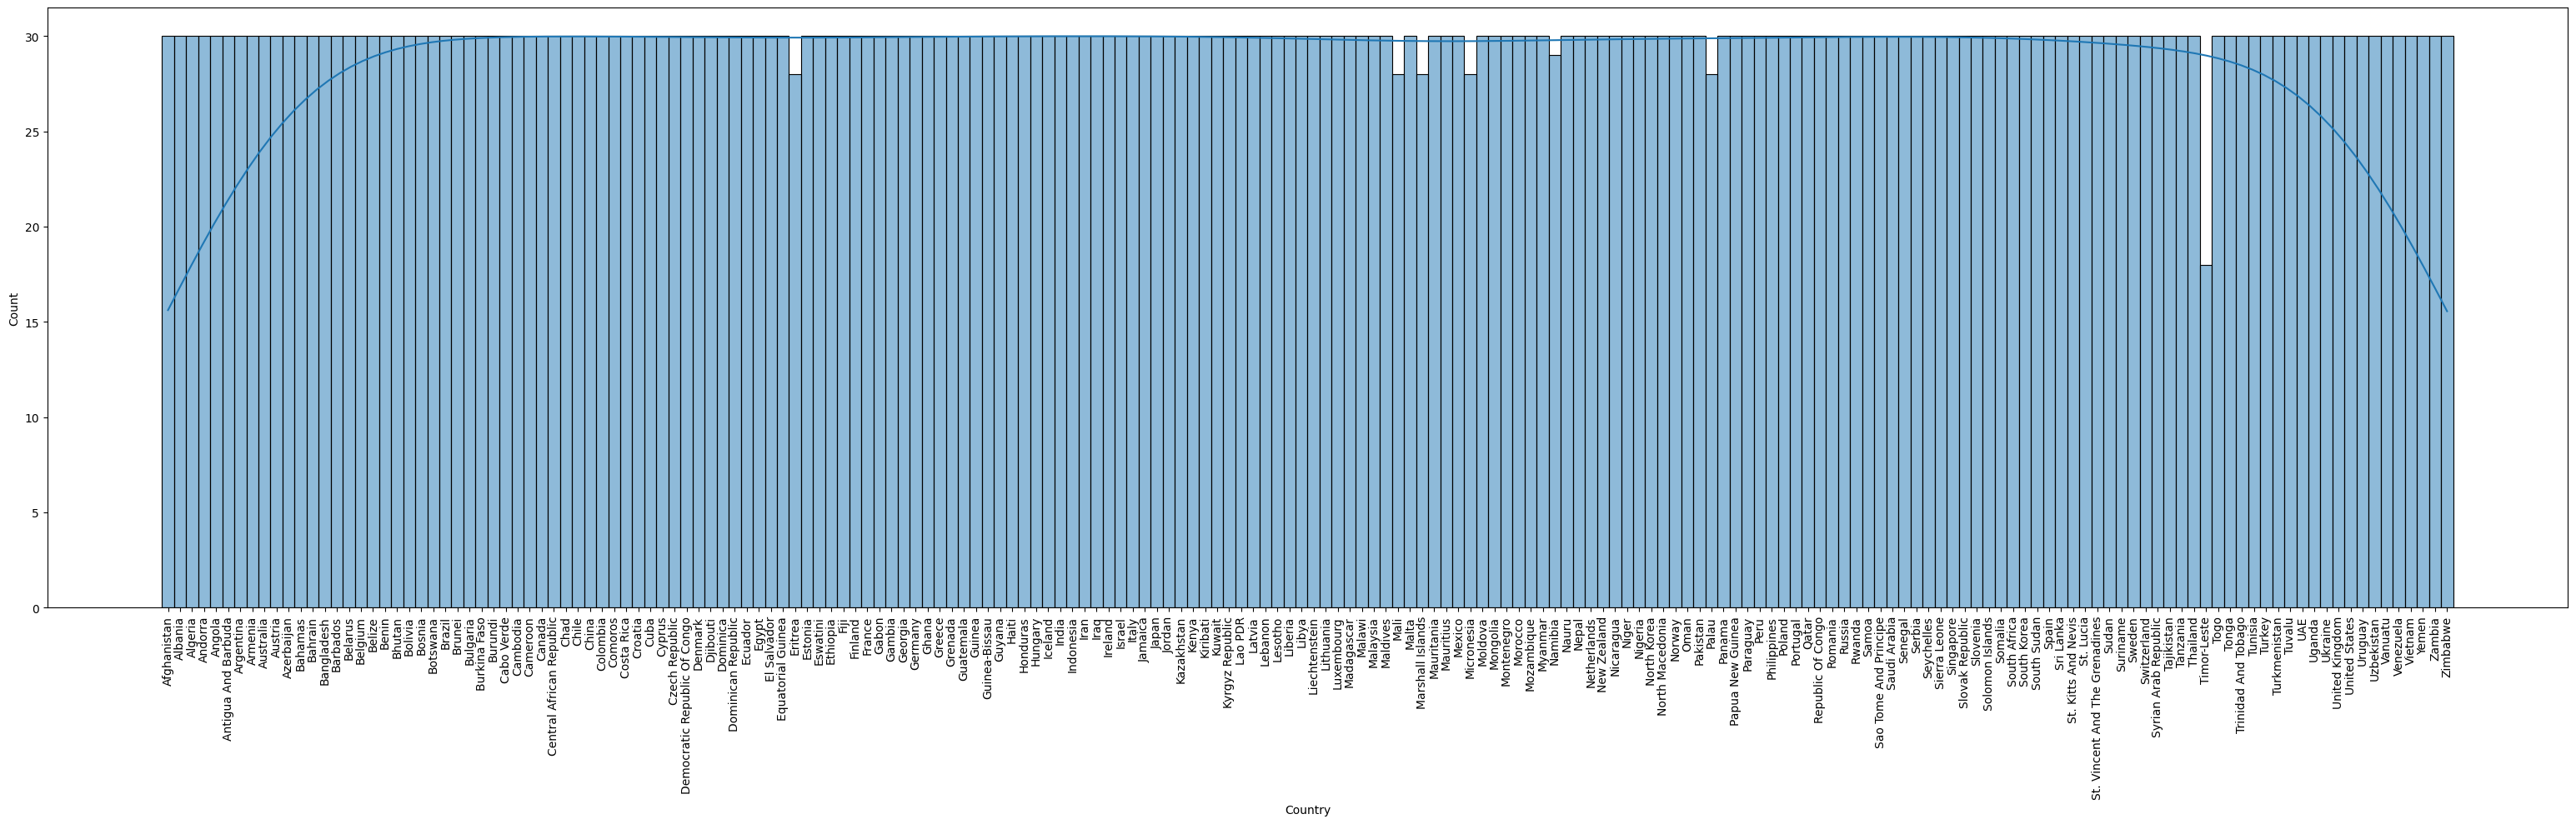

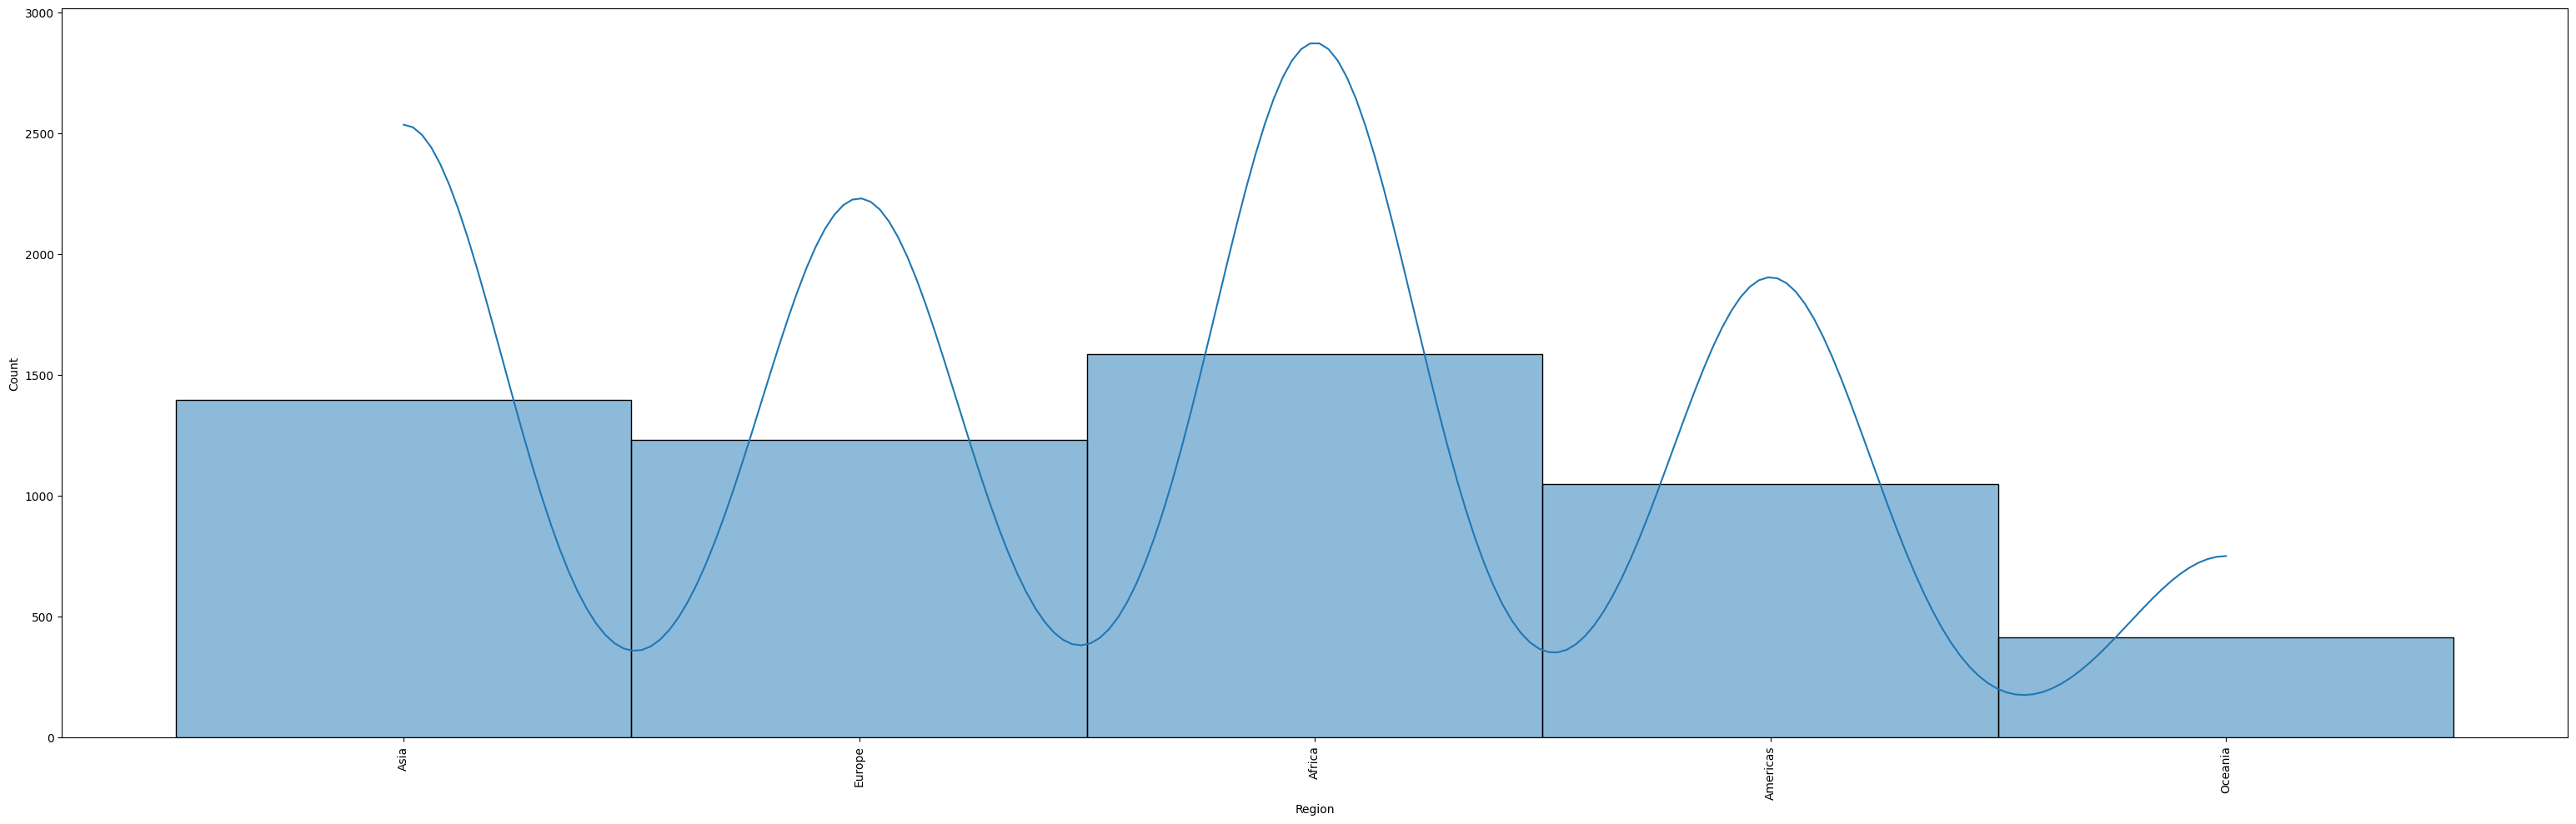

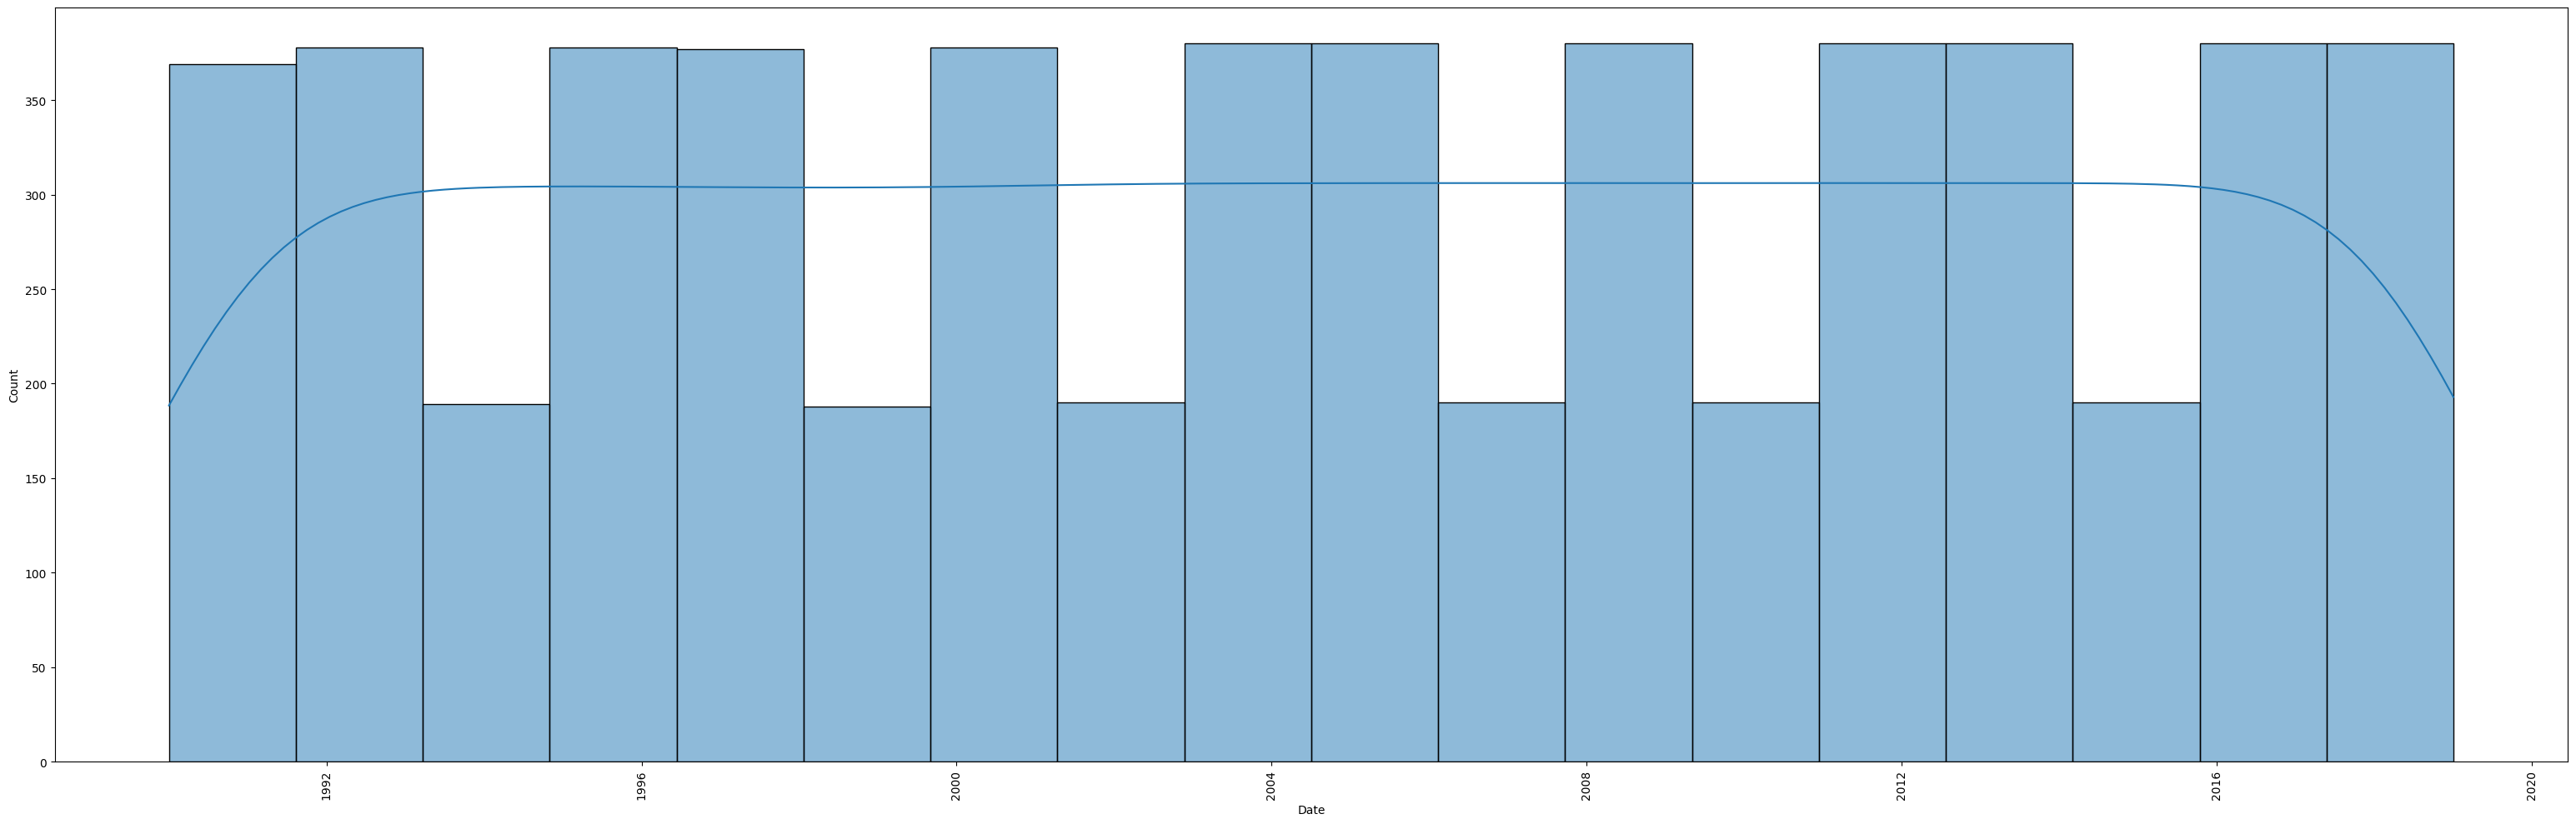

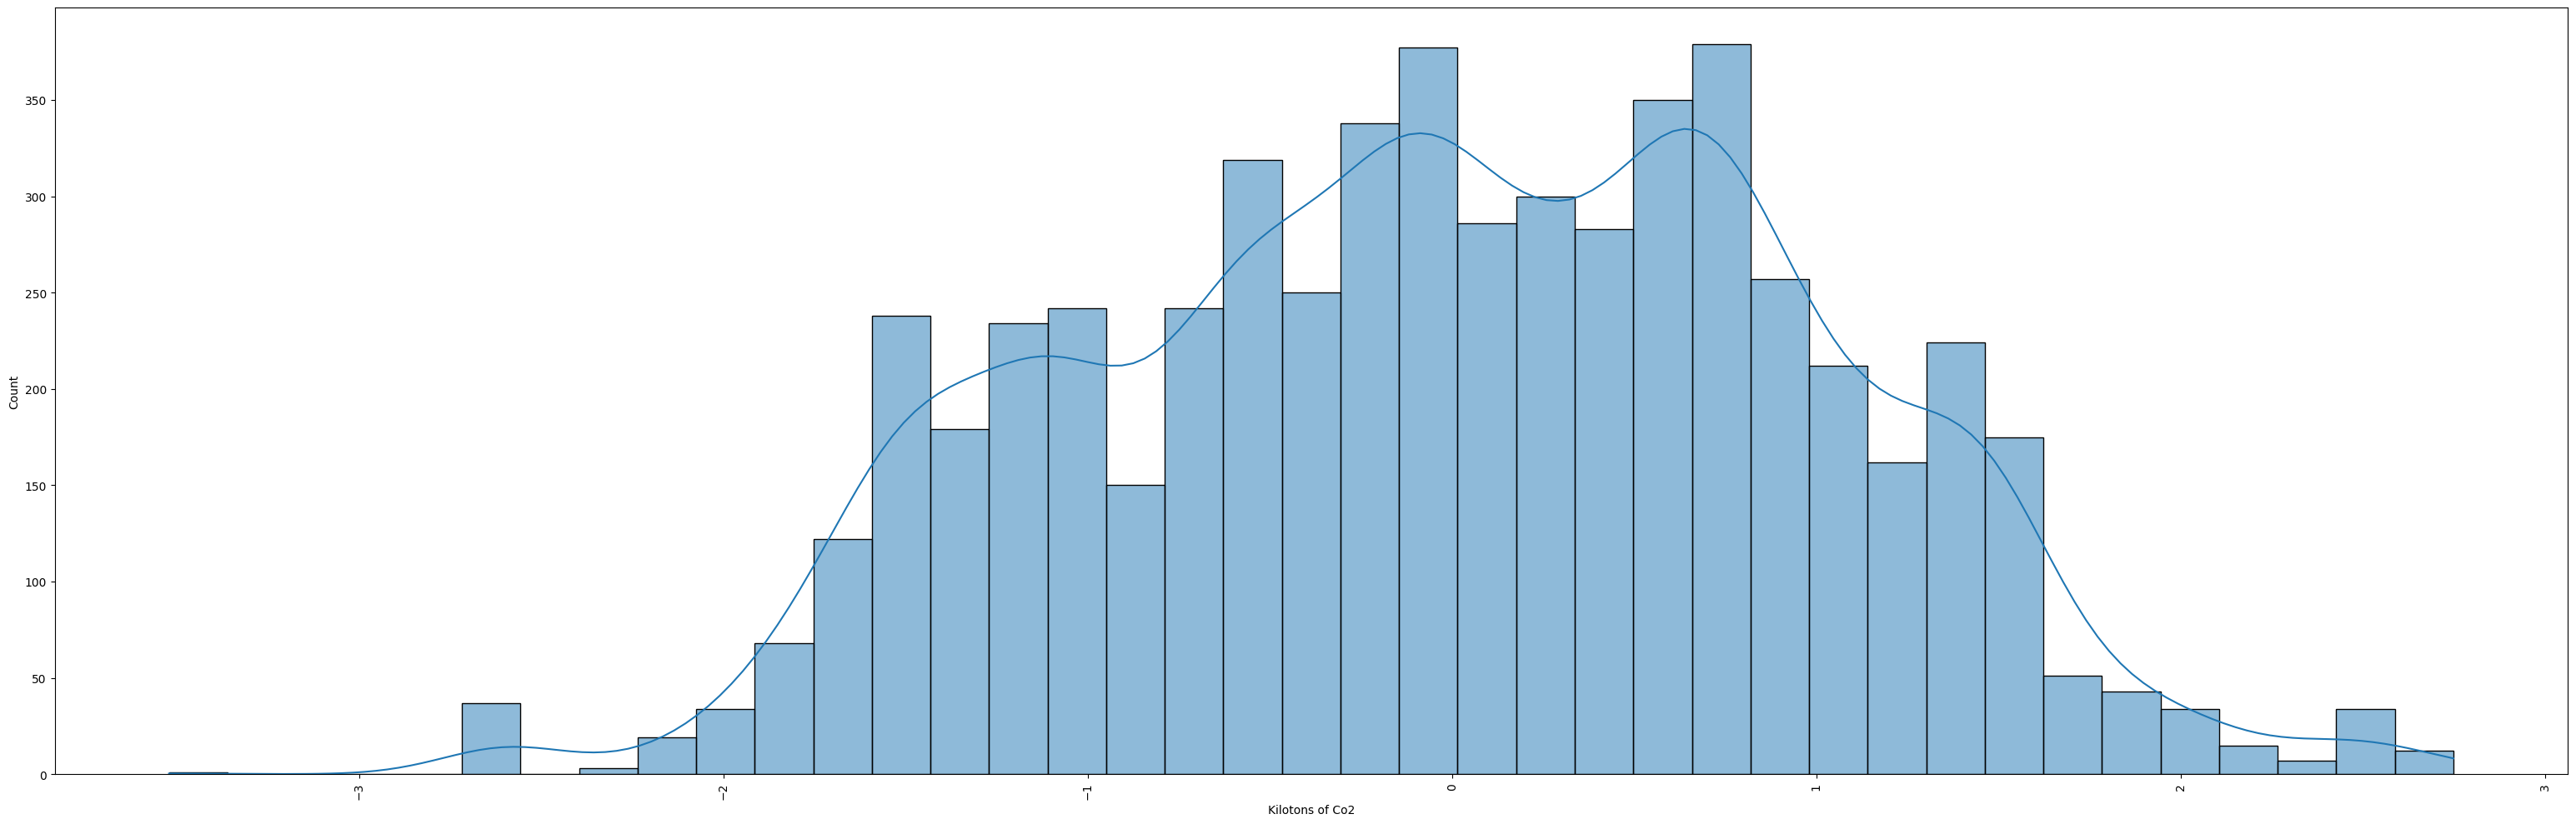

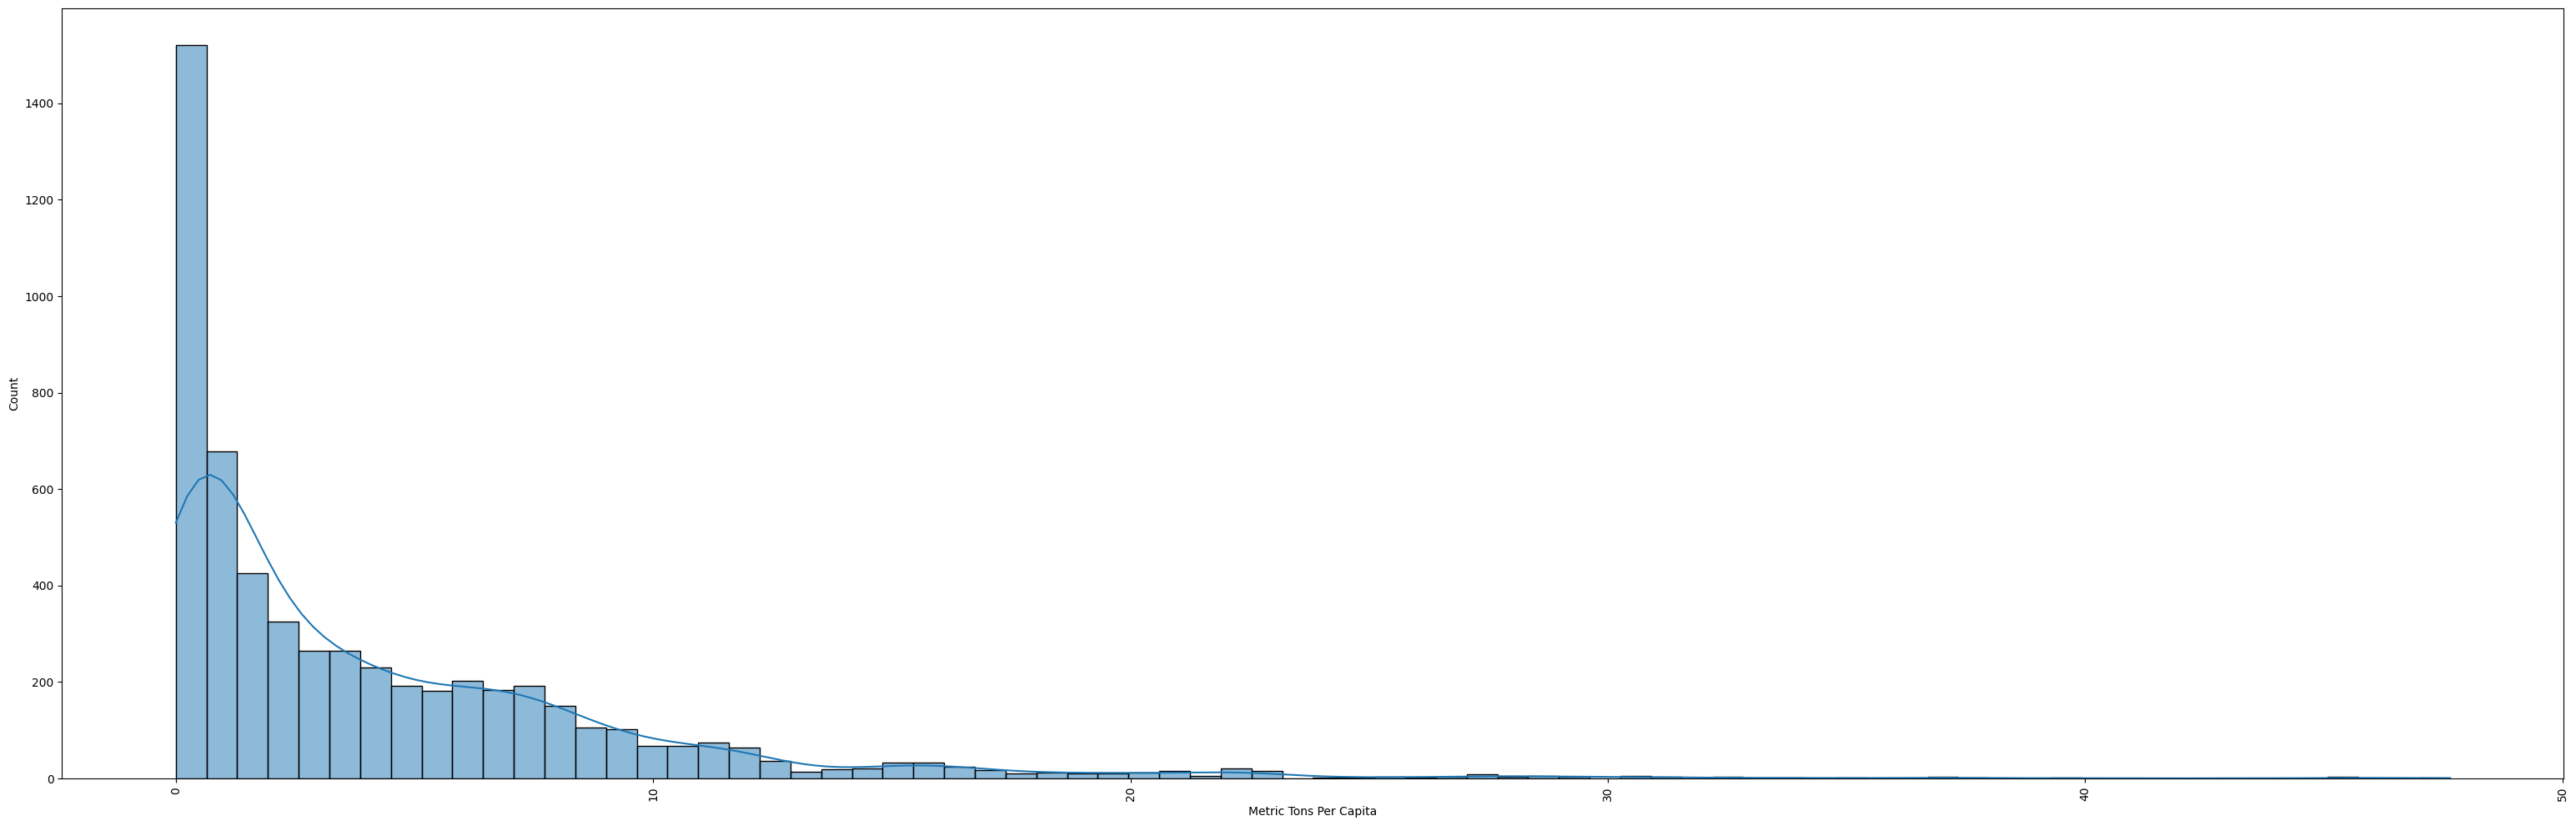

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in df:
    plt.figure(figsize=(31,10))
    sns.histplot(x=col, data=df, kde=True)
    plt.xticks(rotation=90)  # Rotate x-axis labels if needed
    plt.tight_layout()  # Ensure labels fit into the figure
    plt.show()


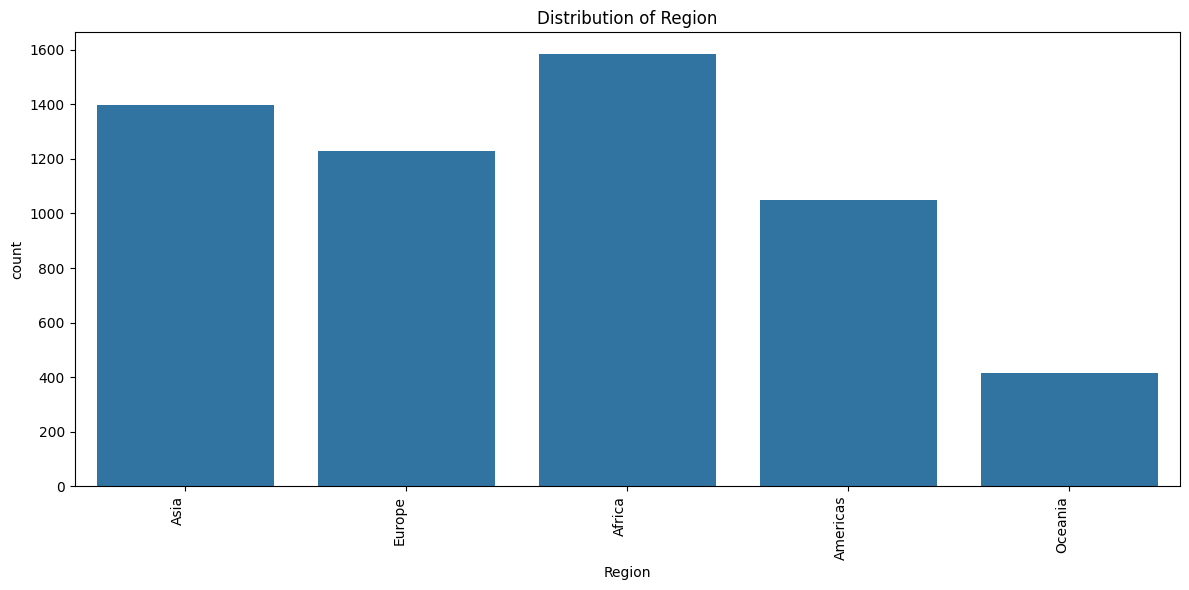

In [52]:
for col in df:
    if df[col].dtype == 'O' and col != 'Country':  # Skip the 'Country' column
        plt.figure(figsize=(12,6))  # Adjust the figure size to avoid clumsy visuals
        sns.countplot(x=col, data=df)

        # Rotate the x-axis labels by 90 degrees for better visibility
        plt.xticks(rotation=90, ha='right')  # 'ha' is for horizontal alignment of the labels

        # Optionally, you can limit the number of x-ticks if there are too many categories
        max_ticks = 15  # You can change this number based on your data
        if len(df[col].unique()) > max_ticks:
            plt.xticks(ticks=range(0, max_ticks), rotation=90, ha='right')

        plt.title(f'Distribution of {col}')
        plt.tight_layout()  # Ensure the labels do not get cut off
        plt.show()


The above countplot shows that each region has equal reresntation in the dataset and that the dataset is balanced

In [54]:
import plotly.express as px
import pandas as pd

# Assuming df is already defined and contains the data

# Define the columns you want to plot
columns = ['Country', 'Region', 'Date', 'Kilotons of Co2', 'Metric Tons Per Capita']

# Iterate through each column and create a bar chart or histogram
for column in columns:
    try:
        if column not in df.columns:
            print(f"Column {column} does not exist in the DataFrame")
            continue

        # Check if the column is suitable for a bar chart (categorical data)
        if df[column].dtype == 'object' or df[column].dtype.name == 'category':
            # Count the occurrences of each unique value
            column_counts = df[column].value_counts().reset_index()
            column_counts.columns = [column, 'count']
            
            # Create a bar chart using plotly.express
            fig = px.bar(
                column_counts,
                x=column,
                y='count',
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                text='count',
                color='count',  # Add color based on 'count'
                color_continuous_scale='Blues'  # Use a color scale for a better look
            )
            
            # Update layout for better readability and aesthetics
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',  # Transparent background
                plot_bgcolor='rgba(0,0,0,0)',  # Transparent plot background
                title_font=dict(size=22, family="Arial", color='darkblue'),
                xaxis={'categoryorder': 'total descending'},
                font=dict(family="Arial", size=12, color='black'),
                bargap=0.2,  # Adjust the space between bars
                showlegend=False  # Hide legend
            )
            
            # Show the figure
            fig.show()

        # For numerical data (histogram)
        elif df[column].dtype in ['int64', 'float64']:
            # Create a histogram for numerical columns
            fig = px.histogram(
                df,
                x=column,
                title=f'Distribution of {column}',
                labels={column: column, 'count': 'Count'},
                color_discrete_sequence=['#FF6347'],  # Change bar color to tomato
                opacity=0.7  # Slight transparency for bars
            )
            
            # Update layout for better readability
            fig.update_layout(
                xaxis_title=column,
                yaxis_title='Count',
                paper_bgcolor='rgba(0,0,0,0)',
                plot_bgcolor='rgba(0,0,0,0)',
                title_font=dict(size=22, family="Arial", color='darkblue'),
                font=dict(family="Arial", size=12, color='black'),
                showlegend=False
            )
            
            # Show the figure
            fig.show()

    except Exception as e:
        print(f"Could not create plot for column {column}: {e}")


In [38]:
df

,Country,Region,Date,Kilotons of Co2,Metric Tons Per Capita
0,Afghanistan,Asia,2011-01-01,-0.002169,0.31
1,Afghanistan,Asia,2012-01-01,-0.040943,0.27
2,Afghanistan,Asia,2010-01-01,-0.090517,0.25
3,Afghanistan,Asia,2019-01-01,-0.151176,0.16
4,Afghanistan,Asia,2018-01-01,-0.151814,0.17
...,...,...,...,...,...
5672,Zimbabwe,Africa,2004-01-01,0.032682,0.80
5673,Zimbabwe,Africa,2007-01-01,0.032285,0.78
5674,Zimbabwe,Africa,2010-01-01,0.025877,0.75
5675,Zimbabwe,Africa,2009-01-01,-0.057107,0.61


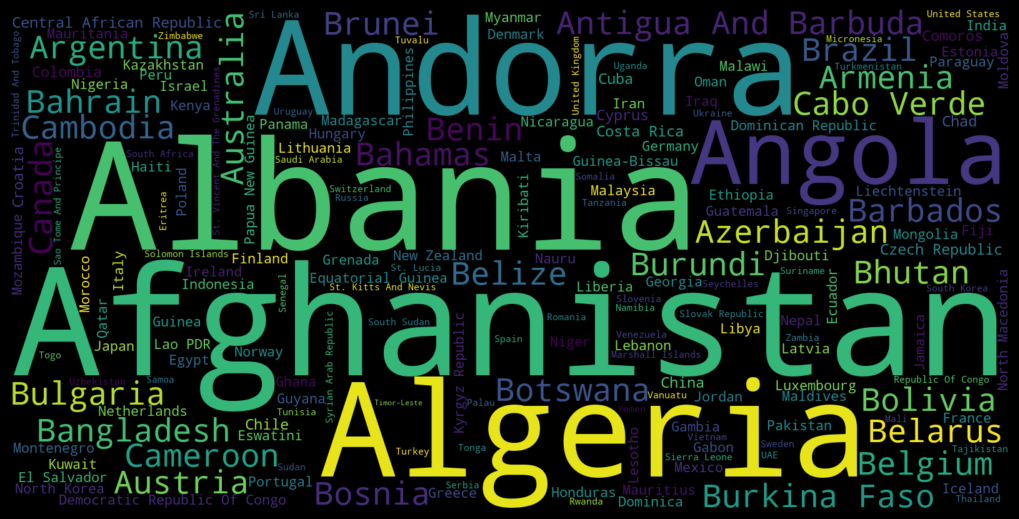

In [39]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import pandas as pd

# Assuming `dataset` is your DataFrame and `stop_words_list` is a list of stopwords

# Example stopwords list, modify as needed
stop_words_list = set(STOPWORDS)

# Generate frequency counts from the 'business_category' column
counts = Counter(df["Country"].dropna().apply(lambda x: str(x)))

# Generate the word cloud
wcc = WordCloud(
    background_color="black",
    width=1600, height=800,
    max_words=2000,
    stopwords=stop_words_list
)
wcc.generate_from_frequencies(counts)

# Display the word cloud
plt.figure(figsize=(10, 5), facecolor='k')
plt.imshow(wcc, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

the word cloud here shows the most common words in the dataset like albania, afghanistan, algeria and some other countries like Bhutan, Australia, Bangladesh, Brazil, Canada, China, Colombia, Egypt, France, Germany, India, Indonesia, Iran, Iraq, Italy, Japan, Kazakhstan, Kenya, Korea, Kuwait, Malaysia, Mexico, Morocco, Myanmar, Netherlands, Nigeria, Pakistan, Peru, Philippines, Poland, Qatar, Romania, Russia, Saudi Arabia, South Africa, Spain, Sudan, Sweden, Thailand, Turkey, Ukraine, United Kingdom, United States, Uzbekistan, Venezuela, Vietnam, Yemen, Zambia, Zimbabwe

In [ ]:
df.isnull().sum()

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

df.dtypes

Country                           object
Region                            object
Date                      datetime64[ns]
Kilotons of Co2                  float64
Metric Tons Per Capita           float64
dtype: object

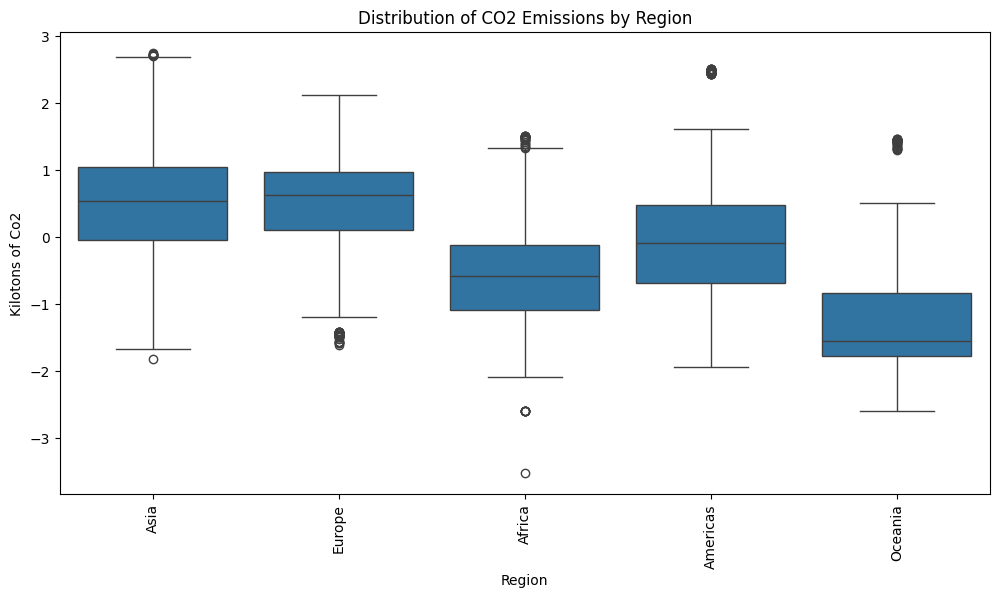

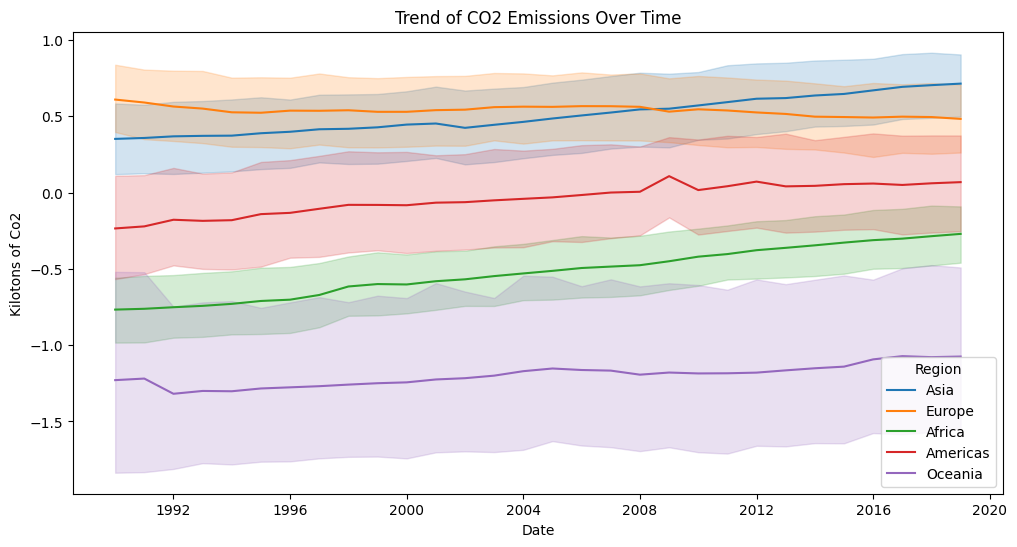

In [41]:
# Summary statistics
df.describe()

# Distribution of CO2 emissions by region
plt.figure(figsize=(12, 6))
sns.boxplot(x='Region', y='Kilotons of Co2', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of CO2 Emissions by Region')
plt.show()

# Trend of CO2 emissions over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Kilotons of Co2', hue='Region', data=df)
plt.title('Trend of CO2 Emissions Over Time')
plt.show()


The box plot might show that certain regions like North America or Europe have a higher median of CO2 emissions, while regions like Africa or Asia might have lower CO2 emissions on average.
Outliers can help identify countries that significantly contribute to CO2 emissions.

You may notice upward trends in developed regions over time, indicating an increase in emissions, or perhaps downward trends in certain regions where environmental policies have been enacted.

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data for modeling
X = df[['Metric Tons Per Capita']]
y = df['Kilotons of Co2']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 0.84
R^2 Score: 0.16


# CO2 Emissions Analysis Report

## 1. Objectives and Hypothesis:
The main objective of this analysis is to explore and understand the patterns, distributions, and relationships within CO2 emissions data across different countries, regions, and time periods. The hypothesis being tested is: 

**"Does the metric tons of CO2 emissions per capita influence the total kilotons of CO2 emissions across countries?"**

This is significant because understanding CO2 emission patterns is crucial for addressing climate change and implementing effective environmental policies.

## 2. Data Collection and Preprocessing:
- **Data Source:** The dataset used in this analysis is the *"Carbon (CO2) Emissions by Country"* dataset, which contains information on CO2 emissions across different countries and regions.
- **Data Cleaning:** Missing values were handled by analyzing and visualizing the dataset, while columns with missing or irrelevant data were appropriately managed or excluded. The 'Date' column was converted to datetime format for time-series analysis.
- **Visualization:** Histograms, box plots, count plots, and line plots were used to visualize distributions and trends in CO2 emissions.

## 3. Descriptive Analysis:
- **Summary Statistics:** Descriptive statistics like mean, median, and standard deviation were calculated for the numerical variables. The dataset contains a wide range of CO2 emissions, with a few countries contributing heavily to total emissions.
- **Distributions and Patterns:**
   - **CO2 Emissions by Region:** A box plot was used to examine the distribution of CO2 emissions by region. It was observed that regions like North America and Europe exhibited higher CO2 emissions compared to others.
   - **Trend Over Time:** A line plot was created to visualize CO2 emissions over time. The trend showed an increase in emissions, particularly from industrialized countries.
   - **Categorical Distributions:** Count plots revealed that the dataset is dominated by a few countries and regions, with some regions like North America having a disproportionate representation.

## 4. Inferential Analysis:
- **Hypothesis Testing:** A linear regression model was applied to predict the relationship between 'Metric Tons Per Capita' and 'Kilotons of CO2'. The model demonstrated a moderate predictive capability, with an R-squared value indicating some degree of correlation.
- **Bootstrapping:** Bootstrapping methods can be used to estimate the sampling distribution of the CO2 emissions estimates, generating confidence intervals to assess the reliability of the predictive model, especially in the presence of skewed data.

## 5. Skewed Data Handling:
To address skewed distributions in numerical columns, transformations like logarithmic scaling were considered. For categorical data, a careful examination of overrepresented and underrepresented categories helped in visualizing balanced or imbalanced distributions.

## 6. Conclusions and Recommendations:
The analysis revealed significant trends and correlations in the data, with particular emphasis on the impact of per capita emissions on total CO2 emissions. Key insights include:
- Some regions (like North America and Europe) exhibit disproportionately high emissions.
- The linear regression model shows that per capita emissions have a notable influence on total emissions.
- There is a need for more balanced data representation for more accurate models and insights.

For future work, further exploration into more granular environmental data and the inclusion of other variables like energy consumption or industrial activities could provide deeper insights into the causes of CO2 emissions. Additionally, handling skewness and outliers more rigorously could improve the accuracy and robustness of the analysis.
